/Users/minjuling/opt/anaconda3/envs/pytorch3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (8,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['Unnamed: 0', 'id', 'name', 'producer', 'nation', 'local1', 'local2',
       'local3', 'local4', 'varieties1', 'varieties2', 'varieties3',
       'varieties4', 'varieties5', 'varieties6', 'varieties7', 'varieties8',
       'varieties9', 'varieties10', 'varieties11', 'varieties12', 'type',
       'use', 'abv', 'degree', 'sweet', 'acidity', 'body', 'tannin', 'price',
       'year', 'ml'],
      dtype='object')
start drawing...


/Users/minjuling/opt/anaconda3/envs/pytorch3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjuling/opt/anaconda3/envs/pytorch3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjuling/opt/anaconda3/envs/pytorch3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjuling/opt/anaconda3/envs/pytorch3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjuling/opt/anaconda3/envs/pytorch3.8/lib/python3.8/site-packages/IPython/core/pylabt

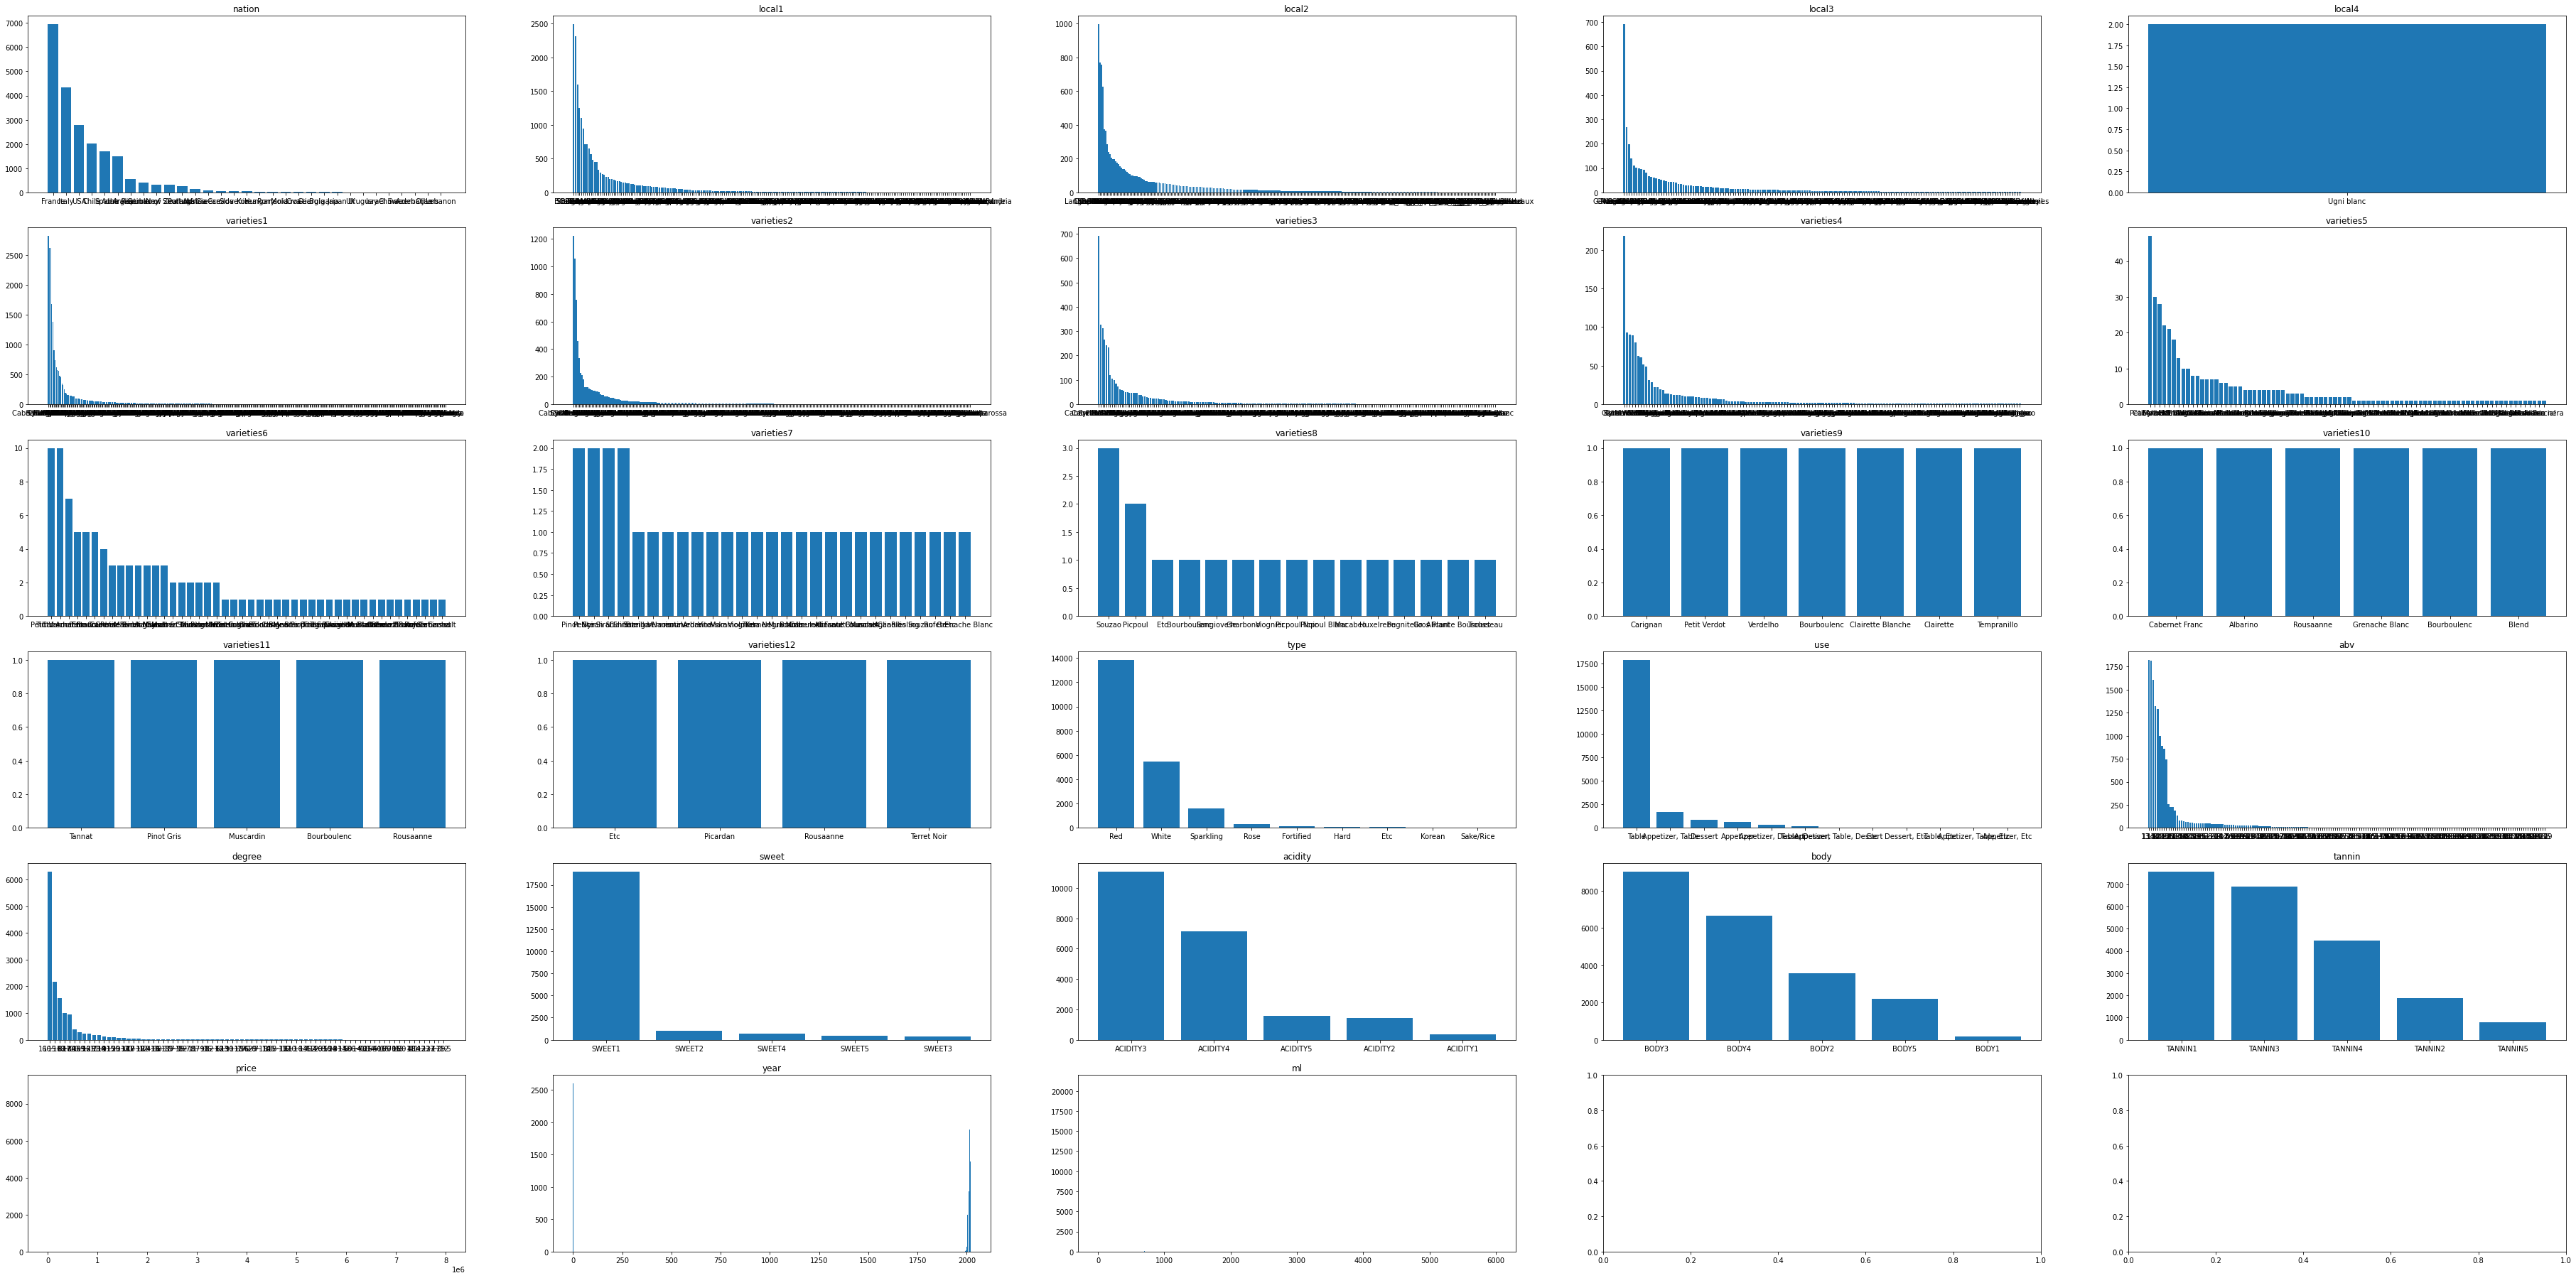

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dir = './cleansingWine.csv/'
frame = pd.read_csv('cleansingWine.csv')
pd.set_option('display.max_columns',None)

plt.rcParams["figure.figsize"] = (64,32)
fig, ax = plt.subplots(6,5)


i=0; j=0
print(frame.columns)
for c in frame.columns:
    if c in ['Unnamed: 0','id','name','producer']: continue
    if c in ['sweet', 'acidity', 'body', 'tannin']: 
        pass
    if j == 5: j = 0; i+=1
    ax[i][j].set_title(c)
    ax[i][j].bar(frame[c].value_counts().index, frame[c].value_counts().values)
    j+=1

print('start drawing...')
plt.show()


#frame.describe()
#frame.describe(include='all')

In [82]:
frame_edited = frame[['id', 'sweet', 'acidity', 'body', 'tannin', 'type']]

In [83]:
# value 값 변화
frame_edited = frame_edited.replace(['SWEET1', 'SWEET2', 'SWEET3', 'SWEET4', 'SWEET5'], [1, 2, 3, 4, 5])
frame_edited = frame_edited.replace(['ACIDITY1', 'ACIDITY2', 'ACIDITY3', 'ACIDITY4', 'ACIDITY5'], [1, 2, 3, 4, 5])
frame_edited = frame_edited.replace(['TANNIN1', 'TANNIN2', 'TANNIN3', 'TANNIN4', 'TANNIN5'], [1, 2, 3, 4, 5])
frame_edited = frame_edited.replace(['BODY1', 'BODY2', 'BODY3', 'BODY4', 'BODY5'], [1, 2, 3, 4, 5])

# type은 red, white, sparkling, rose까지 1,2,3,4로 묶고 나머지는 한번에 5로 묶음
frame_edited = frame_edited.replace(['Red', 'White', 'Sparkling', 'Rose'], [1, 2, 3, 4])
frame_edited = frame_edited.replace(['Fortified', 'Hard', 'Etc', 'Korean', 'Sake/Rice'], 5)

In [84]:
frame_edited.head()

id  sweet  acidity  body  tannin  type
0  137197    1.0      4.0   5.0     4.0   1.0
1  137198    1.0      3.0   4.0     4.0   1.0
2  137199    2.0      3.0   2.0     2.0   1.0
3  137200    1.0      3.0   2.0     1.0   2.0
4  137201    1.0      3.0   3.0     4.0   1.0

In [85]:
frame.tail()
for c in frame.columns:
    if c in ['Unnamed: 0','id','name','producer']: continue
    print(c)
    print(frame[c].value_counts(),end='\n\n')

nation
France                          6949
Italy                           4331
USA                             2771
Chile                           2031
Spain                           1684
Australia                       1490
Argentina                        544
Germany                          415
the Republic of South Africa     321
New Zealand                      305
Portugal                         251
Austria                          132
Greece                            71
Canada                            51
Slovenia                          49
Korea                             42
Hungary                           28
Romania                           25
Moldova                           25
Croatia                           15
Georgia                           14
Bulgaria                          12
Japan                             10
UK                                 7
Uruguay                            7
Israel                             5
China                          

### 데이터 분석 결과

### 1.Nation  
France                          6949   
Italy                           4331  
USA                             2771  
Chile                           2031  
Spain                           1684  
Australia                       1490  

프랑스, 이탈리아가 압도적으로 많으며 상위 5개 국가가 대부분을 차지. 

### 2.Local1-4

Local 4 의 경우 데이터가 2개 밖에 존재하지 않음.

### 3.Varieties1-12

Varieties 1-12 의 경우 생략.


### 4.Sweet - Tannin

당도, 산미, 바디감, 탄닌 총 4개의 항목으로 분류가 되어있으며  
이 중 당도의 경우 SWEET1 이 18995 로 굉장히 편향되어있음.  
수치형 데이터로 변형 필요


### 5.price

데이터 누락된 경우가 9093 으로 상당히 많음.  

50000      319  
40000      288  
60000      281  
35000      276  

35000원에서 50000원 사이 와인이 많으며 785000원 등 일부 고가 와인 포함

### 6.ml

750ml 가 20925개 로 대부분을 차지함. 
134개의 데이터가 용량이 적혀있지 않으며 1500ml, 3000ml 등의 대용량도 44개, 21개 정도 소량 존재함.

### 7.type

Table 데이터가 대부분을 차지.
Table, Appetizer, Dessert, ETC 데이터가 혼재되어있음

### 8.year

없는 데이터: 2601개
1980년부터 1995년산 와인: 극소량 존재. 

### 9.abv
알코올 도수: 13-14도로 대부분 존재.

### 10.Degree
와인을 마시기 적합한 온도.
16-18도가 6295로 대부분의 데이터를 차지. 8-12도 사이도 상당량 존재.

In [86]:
frame_edited.isnull().sum()

id          0
sweet       2
acidity    13
body       13
tannin     13
type       58
dtype: int64

In [87]:
frame_edited.dropna(subset=['sweet','acidity', 'type'], inplace=True)
frame_edited.isnull().sum()

id         0
sweet      0
acidity    0
body       0
tannin     0
type       0
dtype: int64

In [88]:
frame_edited = frame_edited.groupby('sweet', group_keys=False).apply(pd.DataFrame.sample,200)
frame_edited.head()

id  sweet  acidity  body  tannin  type
15728  161931    1.0      3.0   5.0     4.0   1.0
5901   147249    1.0      4.0   5.0     4.0   1.0
19828  166794    1.0      3.0   5.0     3.0   1.0
16070  162289    1.0      3.0   4.0     4.0   1.0
13613  158963    1.0      4.0   4.0     4.0   1.0

In [89]:
# idx reset
frame_edited = frame_edited.reset_index(drop = True)
frame_edited

id  sweet  acidity  body  tannin  type
0    161931    1.0      3.0   5.0     4.0   1.0
1    147249    1.0      4.0   5.0     4.0   1.0
2    166794    1.0      3.0   5.0     3.0   1.0
3    162289    1.0      3.0   4.0     4.0   1.0
4    158963    1.0      4.0   4.0     4.0   1.0
..      ...    ...      ...   ...     ...   ...
995  147749    5.0      2.0   3.0     2.0   1.0
996  149498    5.0      4.0   3.0     1.0   2.0
997  145753    5.0      2.0   2.0     1.0   2.0
998  166465    5.0      4.0   4.0     1.0   2.0
999  142838    5.0      1.0   2.0     3.0   1.0

[1000 rows x 6 columns]

In [90]:
# csv 저장
frame_edited.to_csv("./sample_cleansingWine.csv", mode = 'w')

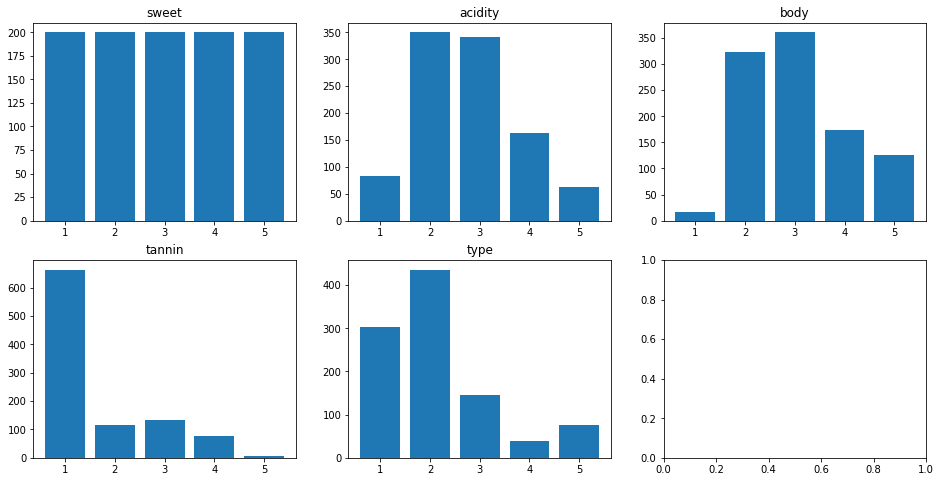

In [91]:
# sample 데이터 분석
pd.set_option('display.max_columns',None)

plt.rcParams["figure.figsize"] = (16,8)
fig, ax = plt.subplots(2,3)


i=0; j=0

for c in frame_edited.columns:
    if c in ['sweet', 'acidity', 'body', 'tannin', 'type']: 
        if j == 3: j = 0; i+=1
        ax[i][j].set_title(c)
        ax[i][j].bar(frame_edited[c].value_counts().index, frame_edited[c].value_counts().values)
        j+=1


In [92]:
print("sweet")
print(frame_edited['sweet'].value_counts())
print("acidity")
print(frame_edited['acidity'].value_counts())
print("body")
print(frame_edited['body'].value_counts())
print("tannin")
print(frame_edited['tannin'].value_counts())
print("type")
print(frame_edited['type'].value_counts())

sweet
1.0    200
2.0    200
3.0    200
4.0    200
5.0    200
Name: sweet, dtype: int64
acidity
2.0    350
3.0    342
4.0    163
1.0     82
5.0     63
Name: acidity, dtype: int64
body
3.0    361
2.0    324
4.0    173
5.0    126
1.0     16
Name: body, dtype: int64
tannin
1.0    664
3.0    134
2.0    116
4.0     78
5.0      8
Name: tannin, dtype: int64
type
2.0    436
1.0    304
3.0    145
5.0     76
4.0     39
Name: type, dtype: int64


In [93]:
check_for_nan = frame_edited.isnull().values.any()
check_for_nan

False